In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/dataset_800_baris.csv")
df.head()

,Nama,Gender,Tanggal_Lahir,Alamat,Pekerjaan,Email,Nomor_Telepon
0,Paris Firgantoro,Perempuan,1991-07-21,"Jalan Sukajadi No. 1, Bukittinggi, KR 06548",Tax inspector,platupono@hotmail.com,+62 (55) 579-1471
1,Lanang Yuliarti,Laki-laki,2001-06-23,"Jalan HOS. Cokroaminoto No. 76, Magelang, Kali...",Passenger transport manager,hwacana@perum.or.id,+62 (092) 176-0538
2,Hilda Pradana,Perempuan,2005-03-10,"Jalan Kapten Muslihat No. 675, Kediri, Kaliman...",Youth worker,sinagaajimin@perum.desa.id,+62 (38) 340 7077
3,"Lamar Manullang, M.Kom.",Perempuan,1997-02-24,"Gang Tebet Barat Dalam No. 41, Pangkalpinang, ...","Exhibitions officer, museum/gallery",putisuwarno@pd.or.id,+62 (541) 978 5471
4,Garan Zulkarnain,Laki-laki,1987-09-24,"Gg. Raya Ujungberung No. 679, Yogyakarta, Malu...","Scientist, clinical (histocompatibility and im...",pardi58@pd.my.id,(000) 396 9738


In [ ]:
df = df[['Gender', 'Tanggal_Lahir']]

In [ ]:
df.head()

,Gender,Tanggal_Lahir
0,Perempuan,1991-07-21
1,Laki-laki,2001-06-23
2,Perempuan,2005-03-10
3,Perempuan,1997-02-24
4,Laki-laki,1987-09-24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         800 non-null    object
 1   Tanggal_Lahir  800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [ ]:
group = df.groupby('Gender').count()
group

,Tanggal_Lahir
Gender,
Laki-laki,388
Perempuan,412


In [ ]:
df['Tanggal_Lahir'] = pd.to_datetime(df['Tanggal_Lahir'], format= '%Y-%m-%d')

hari_ini = dt.datetime.now()
df['usia'] = ((hari_ini - df['Tanggal_Lahir']).dt.days // 365)

df.head()

,Gender,Tanggal_Lahir,usia
0,Perempuan,1991-07-21,34
1,Laki-laki,2001-06-23,24
2,Perempuan,2005-03-10,20
3,Perempuan,1997-02-24,28
4,Laki-laki,1987-09-24,38


In [ ]:
max_usia = df['usia'].max()
bins = list(range(0, (max_usia // 10 + 2) * 10, 10))
labels = [f"{i}an" for i in bins[:-1]]

df['usia_group'] = pd.cut(df['usia'], bins=bins, labels=labels, right=True)


In [ ]:
df_grouped = df.groupby(['Gender', 'usia_group']).size().reset_index(name='count')
print(df_grouped)
jumlah = len(df)
print(f"Jumlah = {jumlah}.")

       Gender usia_group  count
0   Laki-laki        0an      0
1   Laki-laki       10an     27
2   Laki-laki       20an     86
3   Laki-laki       30an     90
4   Laki-laki       40an     92
5   Laki-laki       50an     93
6   Laki-laki       60an      0
7   Perempuan        0an      0
8   Perempuan       10an     27
9   Perempuan       20an     91
10  Perempuan       30an    109
11  Perempuan       40an     96
12  Perempuan       50an     89
13  Perempuan       60an      0
Jumlah = 800.


/tmp/ipython-input-3825514830.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Gender', 'usia_group']).size().reset_index(name='count')


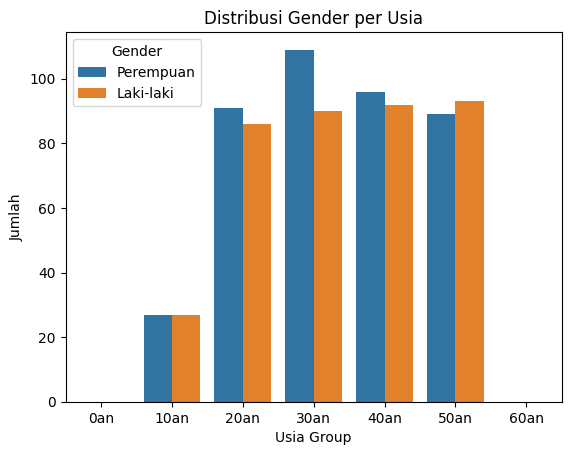

In [ ]:
sns.countplot(data=df, x='usia_group', hue='Gender')
plt.xlabel("Usia Group")
plt.ylabel("Jumlah")
plt.title("Distribusi Gender per Usia")
plt.show()